#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 4, 2016

## Next Steps of Our Project

Goals:
* Explore more aspects of our data
* Create clearer visualizations

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We want to explore more features of our data to learn more about the axes of diversity we were initially interested in.  

We also want to modify the presentation of our visualizations from the previous notebook to make them clearer and more impactful.

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [3]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [57]:
df_subset = df[df['ALCLSACT'] < 3]


In [4]:
def mental_health_bars_activity(df, act, emotion, substancestr, emotionstr):
    """
   
    df: dataframe of interest

    act: whether respondant sacrificed important activities, such as taking care of children, 
    taking care of themselves, or working for a substance
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
   
    df_subset = df[df[act] < 3]
    df_subset= df_subset[df_subset[emotion] < 6]
    df_subset['BRACKET'] = df_subset[act]
    df_subset['EMOBRACKET'] = df_subset[emotion]
    
    df_subset.loc[df_subset[emotion] >= 5, 'EMOBRACKET'] = emotionstr +' Never'     
    df_subset.loc[df_subset[emotion] < 5, 'EMOBRACKET'] = emotionstr + ' Some or Little'
    df_subset.loc[df_subset[emotion] < 3, 'EMOBRACKET'] = emotionstr + ' Most or All'
    
   
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped['EMOBRACKET'].value_counts(normalize=True)
    display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, 'EMOBRACKET': em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    display(plotting_df)
    
    
    p, ax = plt.subplots()
    #_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    hue_order_list = [emotionstr + ' Most or All' , emotionstr + ' Some or Little', emotionstr + ' Never']
    p = sns.barplot(x="BRACKET", y="percentage", hue="EMOBRACKET", hue_order=hue_order_list, data=plotting_df)
    ax.set_xticklabels(['yes', 'no'])
    xlabel = 'Gave up or spent less time on important activities'
    plt.xlabel(xlabel)
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    title =  'Sacrificed Important Activities due to ' + substancestr
    plt.title(title)
    plt.show()
    
    return


In [5]:
def sacrificed_activities(df, act,  substancestr,  used_ever):
    """
    Shows plot of how many respondants who have used the substance make these sacrifices for the substance.
    df: dataframe of interest
    act: whether respondant sacrificed important activities, such as taking care of children, 
    taking care of themselves, or working for a substance
    emotion: mental health aspect of interest
    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """     
   
    df_subset = df[df[act]< 3]
    df_subset['BRACKET'] = df_subset[act]    
    df_substance_subset = df_subset[df_subset[used_ever] == 1]
    yvals = df_substance_subset['BRACKET'].value_counts()
    sns.pointplot(x=[0,1], y=yvals)
    point_plot_title = '# Of Respondants Reporting Sacrificing Important Activites For ' + substancestr 
    plt.title(point_plot_title)
    return
    

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.485670
         Hopelessness Never             0.379551
         Hopelessness Most or All       0.134779
2        Hopelessness Never             0.663388
         Hopelessness Some or Little    0.294421
         Hopelessness Most or All       0.042191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,13.477924
1,2,Hopelessness Most or All,4.219133
2,1,Hopelessness Never,37.955074
3,2,Hopelessness Some or Little,29.442113
4,1,Hopelessness Some or Little,48.567002
5,2,Hopelessness Never,66.338755


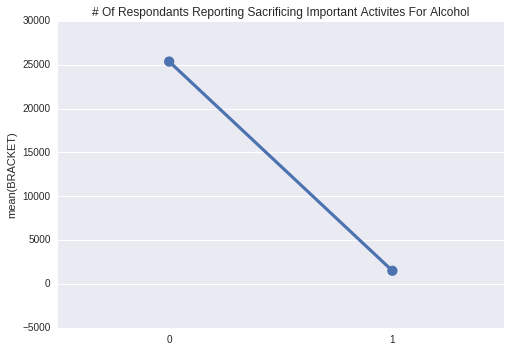

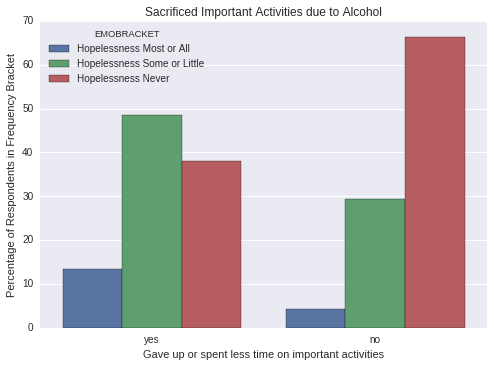

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.653014
         Nervousness Never             0.175425
         Nervousness Most or All       0.171561
2        Nervousness Some or Little    0.596641
         Nervousness Never             0.344968
         Nervousness Most or All       0.058391
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,34.496785
1,2,Nervousness Some or Little,59.664086
2,1,Nervousness Most or All,17.156105
3,1,Nervousness Some or Little,65.301391
4,1,Nervousness Never,17.542504
5,2,Nervousness Most or All,5.839129


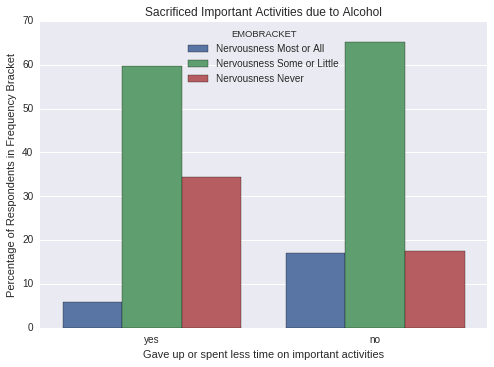

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.585008
         Restlessness Never             0.225657
         Restlessness Most or All       0.189335
2        Restlessness Some or Little    0.491190
         Restlessness Never             0.440607
         Restlessness Most or All       0.068203
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.500773
1,2,Restlessness Never,44.060683
2,1,Restlessness Most or All,18.933539
3,2,Restlessness Most or All,6.820268
4,1,Restlessness Never,22.565688
5,2,Restlessness Some or Little,49.119049


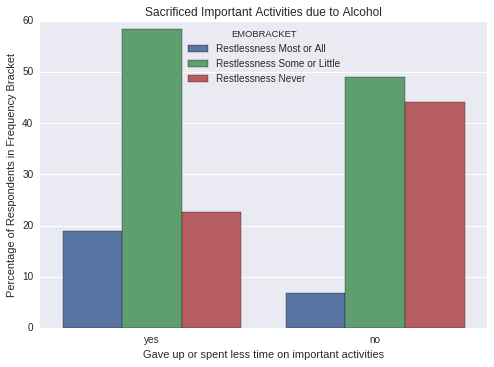

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.490347
         Depression Never             0.378378
         Depression Most or All       0.131274
2        Depression Never             0.678192
         Depression Some or Little    0.282161
         Depression Most or All       0.039647
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,37.837838
1,2,Depression Most or All,3.964681
2,1,Depression Some or Little,49.034749
3,2,Depression Never,67.819207
4,2,Depression Some or Little,28.216112
5,1,Depression Most or All,13.127413


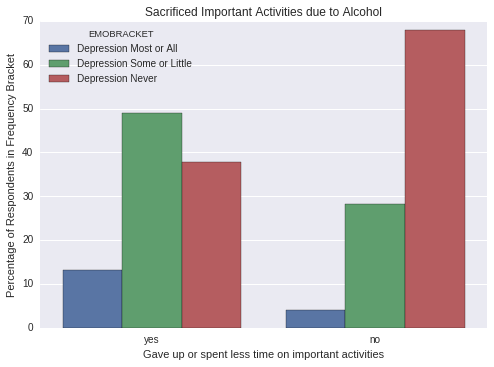

In [6]:
sacrificed_activities(df, 'ALCLSACT',  'Alcohol', 'ALCEVER')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTHOP30', 'Alcohol', 'Hopelessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTNRV30', 'Alcohol', 'Nervousness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTRST30', 'Alcohol', 'Restlessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTCHR30', 'Alcohol', 'Depression')

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.510708
         Hopelessness Never             0.332784
         Hopelessness Most or All       0.156507
2        Hopelessness Never             0.556651
         Hopelessness Some or Little    0.366326
         Hopelessness Most or All       0.077023
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,15.650741
1,2,Hopelessness Most or All,7.702326
2,1,Hopelessness Never,33.278418
3,2,Hopelessness Some or Little,36.632558
4,1,Hopelessness Some or Little,51.070840
5,2,Hopelessness Never,55.665116


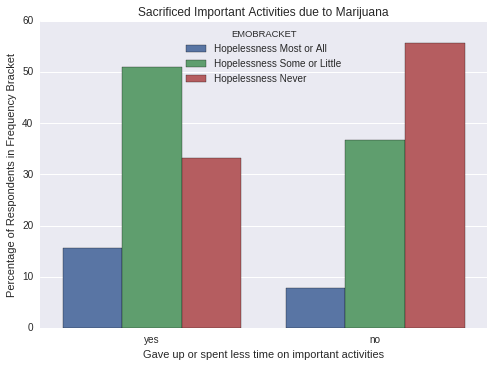

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.652389
         Nervousness Most or All       0.176277
         Nervousness Never             0.171334
2        Nervousness Some or Little    0.601823
         Nervousness Never             0.303515
         Nervousness Most or All       0.094662
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,30.351497
1,2,Nervousness Some or Little,60.182258
2,1,Nervousness Most or All,17.627677
3,1,Nervousness Some or Little,65.238880
4,1,Nervousness Never,17.133443
5,2,Nervousness Most or All,9.466245


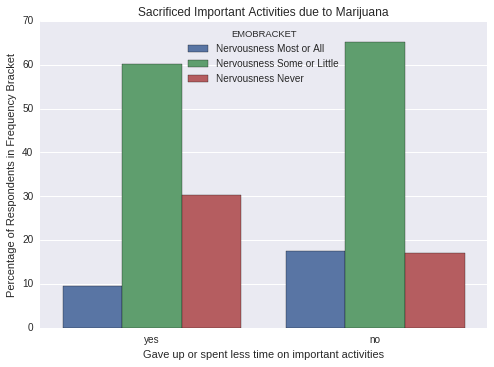

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.564145
         Restlessness Never             0.220395
         Restlessness Most or All       0.215461
2        Restlessness Some or Little    0.522402
         Restlessness Never             0.359918
         Restlessness Most or All       0.117680
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,56.414474
1,2,Restlessness Never,35.991820
2,1,Restlessness Most or All,21.546053
3,2,Restlessness Most or All,11.767987
4,1,Restlessness Never,22.039474
5,2,Restlessness Some or Little,52.240193


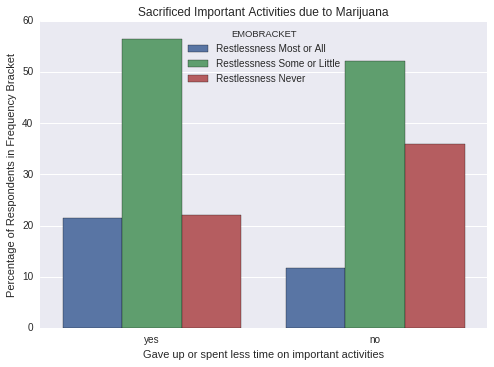

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.480263
         Depression Never             0.365132
         Depression Most or All       0.154605
2        Depression Never             0.559502
         Depression Some or Little    0.366307
         Depression Most or All       0.074191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,36.513158
1,2,Depression Most or All,7.419115
2,1,Depression Some or Little,48.026316
3,2,Depression Never,55.950167
4,2,Depression Some or Little,36.630718
5,1,Depression Most or All,15.460526


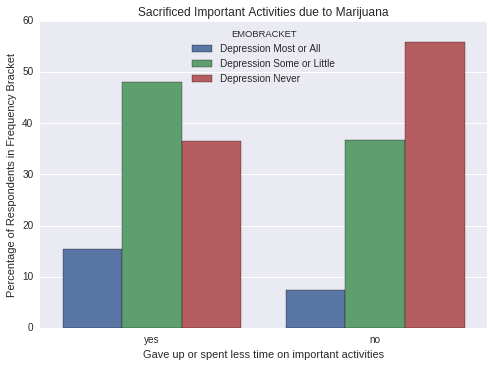

In [7]:
mental_health_bars_activity(df, 'MRJLSACT', 'DSTHOP30', 'Marijuana', 'Hopelessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTNRV30', 'Marijuana', 'Nervousness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTRST30', 'Marijuana', 'Restlessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTCHR30', 'Marijuana', 'Depression')


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.269841
         Hopelessness Never             0.253968
2        Hopelessness Never             0.500000
         Hopelessness Some or Little    0.395161
         Hopelessness Most or All       0.104839
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,26.984127
1,2,Hopelessness Most or All,10.483871
2,1,Hopelessness Never,25.396825
3,2,Hopelessness Some or Little,39.516129
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,50.000000


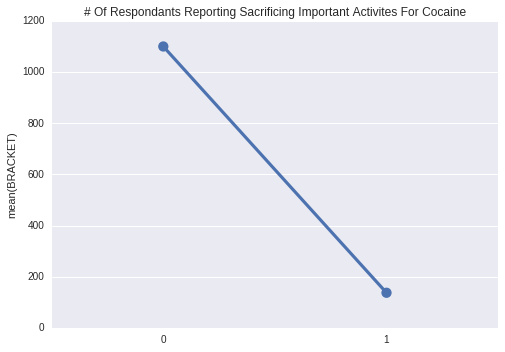

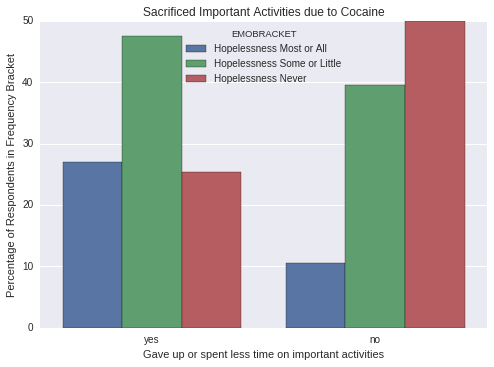

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.507937
         Nervousness Most or All       0.293651
         Nervousness Never             0.198413
2        Nervousness Some or Little    0.608871
         Nervousness Never             0.263105
         Nervousness Most or All       0.128024
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,26.310484
1,2,Nervousness Some or Little,60.887097
2,1,Nervousness Most or All,29.365079
3,1,Nervousness Some or Little,50.793651
4,1,Nervousness Never,19.841270
5,2,Nervousness Most or All,12.802419


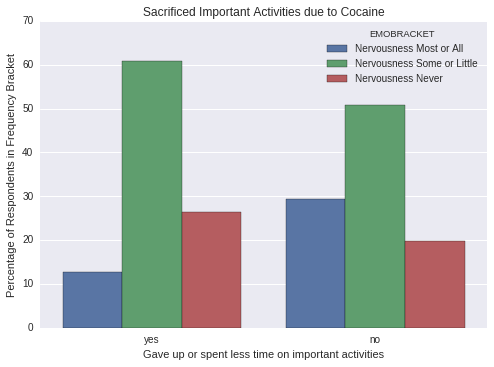

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.539683
         Restlessness Most or All       0.293651
         Restlessness Never             0.166667
2        Restlessness Some or Little    0.570997
         Restlessness Never             0.289023
         Restlessness Most or All       0.139980
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,53.968254
1,2,Restlessness Never,28.902316
2,1,Restlessness Most or All,29.365079
3,2,Restlessness Most or All,13.997986
4,1,Restlessness Never,16.666667
5,2,Restlessness Some or Little,57.099698


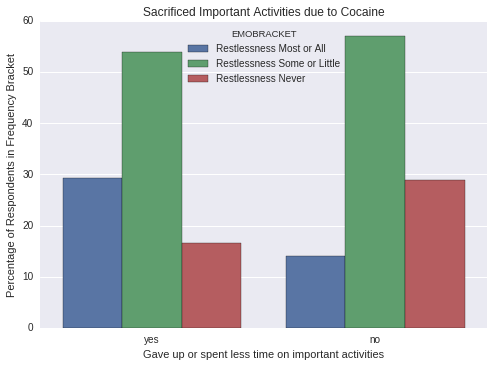

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.531746
         Depression Most or All       0.253968
         Depression Never             0.214286
2        Depression Never             0.499496
         Depression Some or Little    0.416918
         Depression Most or All       0.083585
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,21.428571
1,2,Depression Most or All,8.358510
2,1,Depression Some or Little,53.174603
3,2,Depression Never,49.949648
4,2,Depression Some or Little,41.691843
5,1,Depression Most or All,25.396825


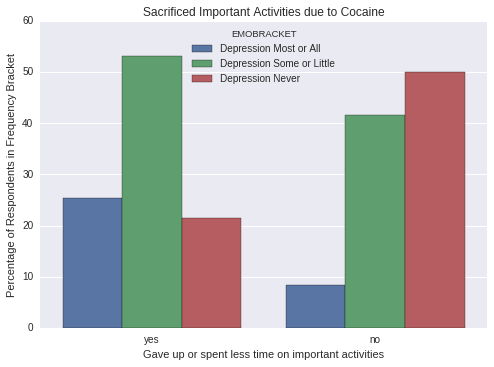

In [8]:
sacrificed_activities(df, 'COCLSACT', 'Cocaine', 'COCEVER' )
mental_health_bars_activity(df, 'COCLSACT', 'DSTHOP30', 'Cocaine', 'Hopelessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTNRV30', 'Cocaine', 'Nervousness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTRST30', 'Cocaine', 'Restlessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTCHR30', 'Cocaine', 'Depression')

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.304762
         Hopelessness Never             0.219048
2        Hopelessness Some or Little    0.504950
         Hopelessness Never             0.336634
         Hopelessness Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,30.476190
1,2,Hopelessness Most or All,15.841584
2,1,Hopelessness Never,21.904762
3,2,Hopelessness Some or Little,50.495050
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,33.663366


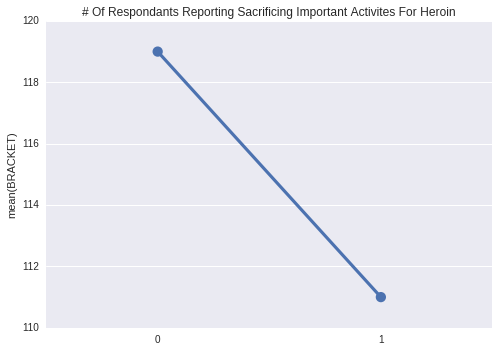

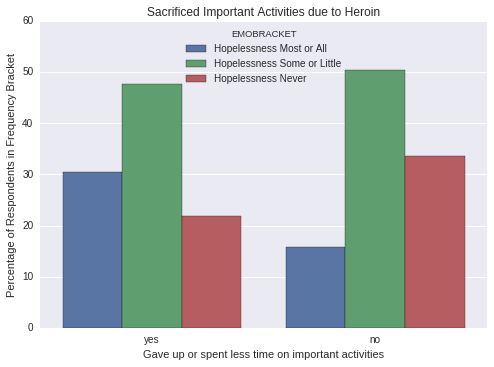

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.638095
         Nervousness Most or All       0.238095
         Nervousness Never             0.123810
2        Nervousness Some or Little    0.623762
         Nervousness Never             0.198020
         Nervousness Most or All       0.178218
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,19.801980
1,2,Nervousness Some or Little,62.376238
2,1,Nervousness Most or All,23.809524
3,1,Nervousness Some or Little,63.809524
4,1,Nervousness Never,12.380952
5,2,Nervousness Most or All,17.821782


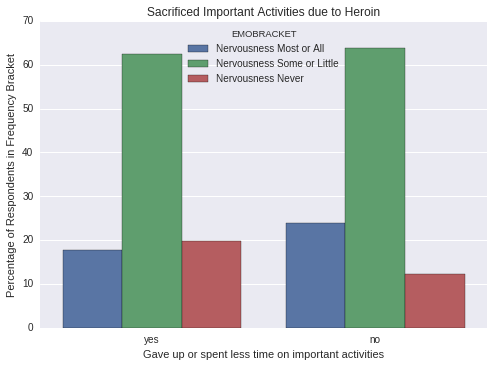

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.580952
         Restlessness Most or All       0.295238
         Restlessness Never             0.123810
2        Restlessness Some or Little    0.534653
         Restlessness Most or All       0.257426
         Restlessness Never             0.207921
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.095238
1,2,Restlessness Never,20.792079
2,1,Restlessness Most or All,29.523810
3,2,Restlessness Most or All,25.742574
4,1,Restlessness Never,12.380952
5,2,Restlessness Some or Little,53.465347


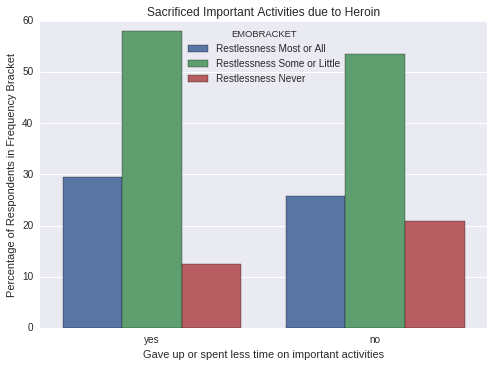

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.523810
         Depression Most or All       0.247619
         Depression Never             0.228571
2        Depression Some or Little    0.485149
         Depression Never             0.356436
         Depression Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,22.857143
1,2,Depression Most or All,15.841584
2,1,Depression Some or Little,52.380952
3,2,Depression Never,35.643564
4,2,Depression Some or Little,48.514851
5,1,Depression Most or All,24.761905


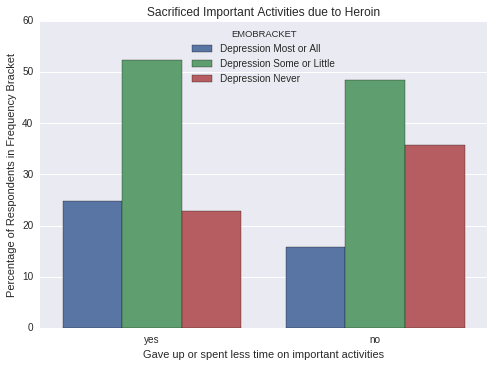

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.416667
         Hopelessness Most or All       0.312500
         Hopelessness Never             0.270833
2        Hopelessness Never             0.488842
         Hopelessness Some or Little    0.412831
         Hopelessness Most or All       0.098326
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,31.250000
1,2,Hopelessness Most or All,9.832636
2,1,Hopelessness Never,27.083333
3,2,Hopelessness Some or Little,41.283124
4,1,Hopelessness Some or Little,41.666667
5,2,Hopelessness Never,48.884240


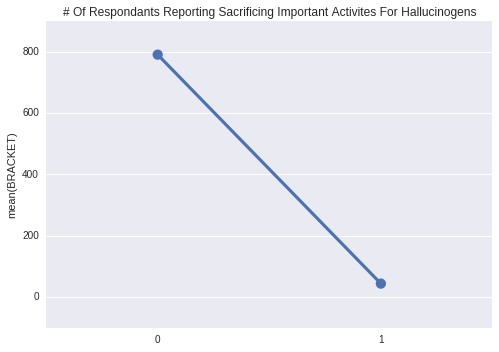

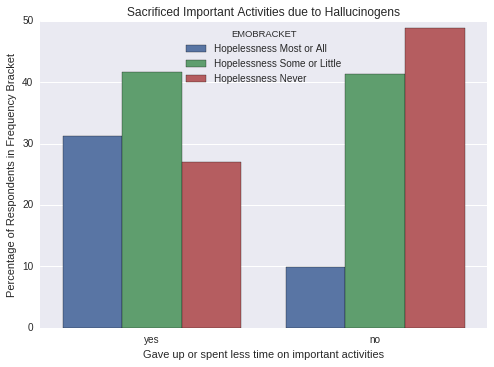

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.604167
         Nervousness Most or All       0.312500
         Nervousness Never             0.083333
2        Nervousness Some or Little    0.653873
         Nervousness Never             0.230286
         Nervousness Most or All       0.115841
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,23.028611
1,2,Nervousness Some or Little,65.387299
2,1,Nervousness Most or All,31.250000
3,1,Nervousness Some or Little,60.416667
4,1,Nervousness Never,8.333333
5,2,Nervousness Most or All,11.584089


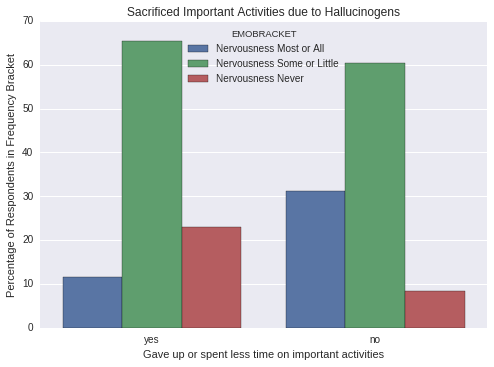

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.416667
         Restlessness Most or All       0.375000
         Restlessness Never             0.208333
2        Restlessness Some or Little    0.574216
         Restlessness Never             0.276655
         Restlessness Most or All       0.149129
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,41.666667
1,2,Restlessness Never,27.665505
2,1,Restlessness Most or All,37.500000
3,2,Restlessness Most or All,14.912892
4,1,Restlessness Never,20.833333
5,2,Restlessness Some or Little,57.421603


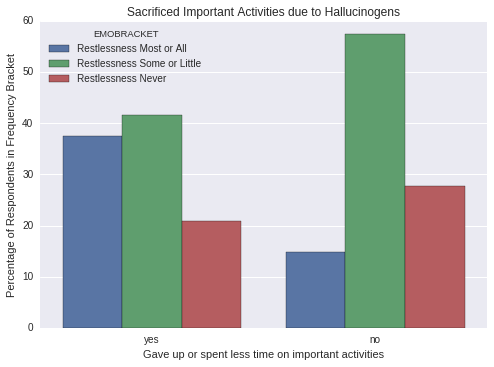

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.375000
         Depression Most or All       0.354167
         Depression Never             0.270833
2        Depression Never             0.488145
         Depression Some or Little    0.421199
         Depression Most or All       0.090656
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,27.083333
1,2,Depression Most or All,9.065551
2,1,Depression Some or Little,37.500000
3,2,Depression Never,48.814505
4,2,Depression Some or Little,42.119944
5,1,Depression Most or All,35.416667


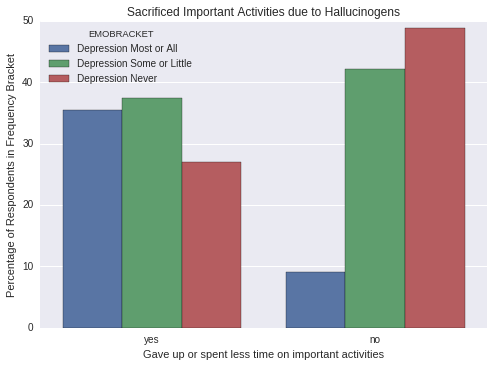

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.495935
         Hopelessness Most or All       0.272358
         Hopelessness Never             0.231707
2        Hopelessness Never             0.460076
         Hopelessness Some or Little    0.434728
         Hopelessness Most or All       0.105196
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,27.235772
1,2,Hopelessness Most or All,10.519645
2,1,Hopelessness Never,23.170732
3,2,Hopelessness Some or Little,43.472750
4,1,Hopelessness Some or Little,49.593496
5,2,Hopelessness Never,46.007605


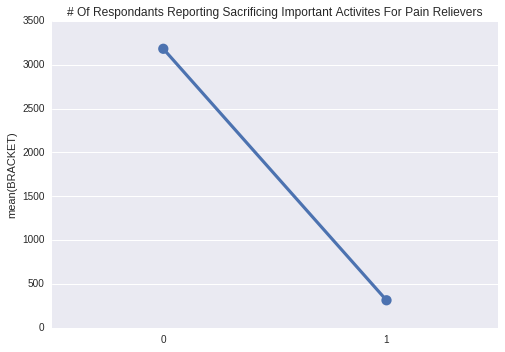

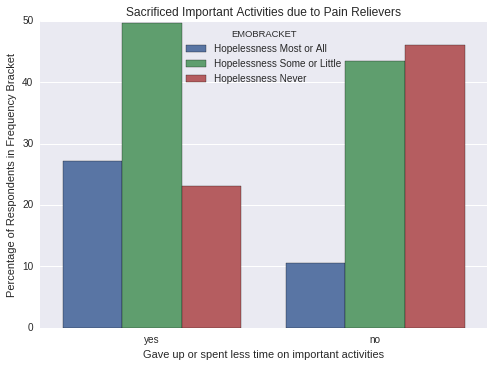

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.597561
         Nervousness Most or All       0.268293
         Nervousness Never             0.134146
2        Nervousness Some or Little    0.641741
         Nervousness Never             0.236586
         Nervousness Most or All       0.121673
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,23.658640
1,2,Nervousness Some or Little,64.174060
2,1,Nervousness Most or All,26.829268
3,1,Nervousness Some or Little,59.756098
4,1,Nervousness Never,13.414634
5,2,Nervousness Most or All,12.167300


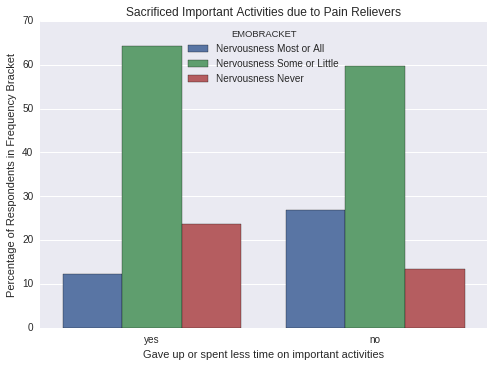

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.516260
         Restlessness Most or All       0.317073
         Restlessness Never             0.166667
2        Restlessness Some or Little    0.564189
         Restlessness Never             0.290963
         Restlessness Most or All       0.144848
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,51.626016
1,2,Restlessness Never,29.096284
2,1,Restlessness Most or All,31.707317
3,2,Restlessness Most or All,14.484797
4,1,Restlessness Never,16.666667
5,2,Restlessness Some or Little,56.418919


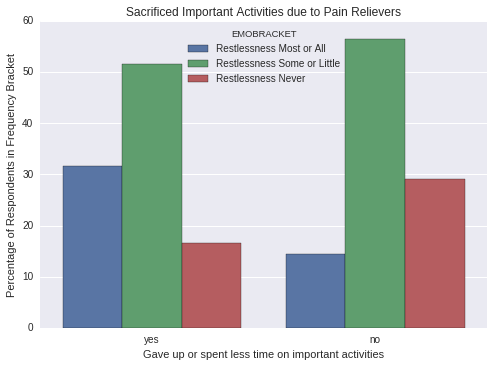

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.475610
         Depression Never             0.280488
         Depression Most or All       0.243902
2        Depression Never             0.461798
         Depression Some or Little    0.435627
         Depression Most or All       0.102575
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,28.048780
1,2,Depression Most or All,10.257493
2,1,Depression Some or Little,47.560976
3,2,Depression Never,46.179823
4,2,Depression Some or Little,43.562685
5,1,Depression Most or All,24.390244


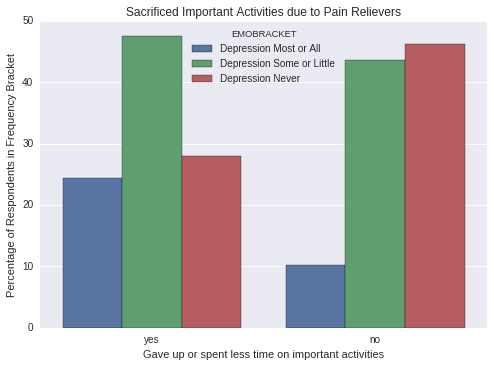

BRACKET  EMOBRACKET                 
1        Hopelessness Most or All       0.508772
         Hopelessness Some or Little    0.403509
         Hopelessness Never             0.087719
2        Hopelessness Some or Little    0.456376
         Hopelessness Never             0.425336
         Hopelessness Most or All       0.118289
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,50.877193
1,2,Hopelessness Most or All,11.828859
2,1,Hopelessness Never,8.771930
3,2,Hopelessness Some or Little,45.637584
4,1,Hopelessness Some or Little,40.350877
5,2,Hopelessness Never,42.533557


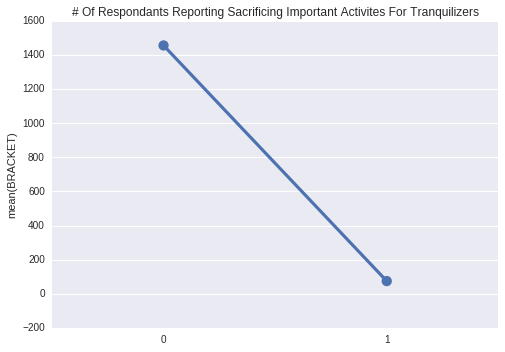

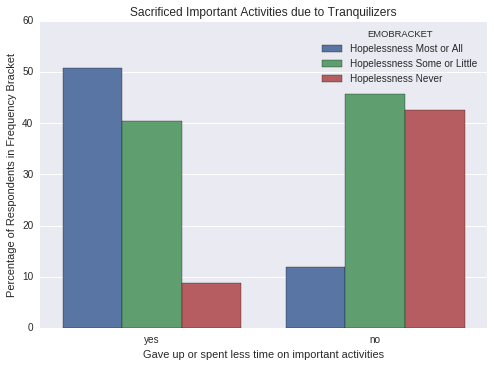

BRACKET  EMOBRACKET                
1        Nervousness Most or All       0.526316
         Nervousness Some or Little    0.403509
         Nervousness Never             0.070175
2        Nervousness Some or Little    0.668346
         Nervousness Never             0.172124
         Nervousness Most or All       0.159530
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,17.212427
1,2,Nervousness Some or Little,66.834593
2,1,Nervousness Most or All,52.631579
3,1,Nervousness Some or Little,40.350877
4,1,Nervousness Never,7.017544
5,2,Nervousness Most or All,15.952981


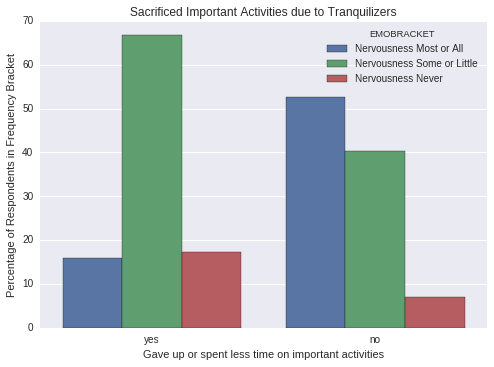

BRACKET  EMOBRACKET                 
1        Restlessness Most or All       0.543860
         Restlessness Some or Little    0.333333
         Restlessness Never             0.122807
2        Restlessness Some or Little    0.569992
         Restlessness Never             0.241408
         Restlessness Most or All       0.188600
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,33.333333
1,2,Restlessness Never,24.140821
2,1,Restlessness Most or All,54.385965
3,2,Restlessness Most or All,18.860017
4,1,Restlessness Never,12.280702
5,2,Restlessness Some or Little,56.999162


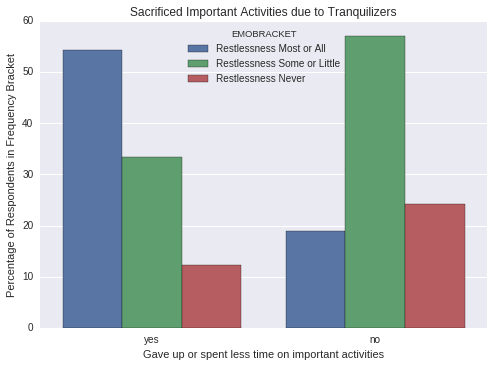

BRACKET  EMOBRACKET               
1        Depression Most or All       0.508772
         Depression Some or Little    0.385965
         Depression Never             0.105263
2        Depression Some or Little    0.464376
         Depression Never             0.425817
         Depression Most or All       0.109807
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,10.526316
1,2,Depression Most or All,10.980721
2,1,Depression Some or Little,38.596491
3,2,Depression Never,42.581727
4,2,Depression Some or Little,46.437552
5,1,Depression Most or All,50.877193


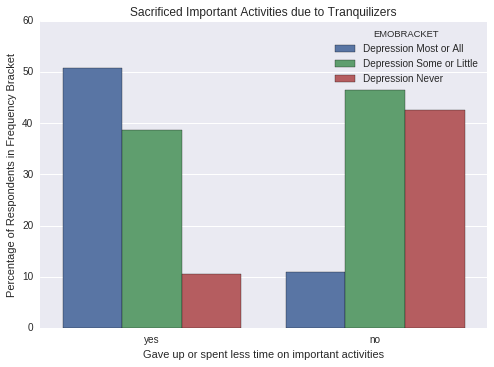

BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.470588
         Hopelessness Most or All       0.282353
         Hopelessness Never             0.247059
2        Hopelessness Never             0.490896
         Hopelessness Some or Little    0.420248
         Hopelessness Most or All       0.088857
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,28.235294
1,2,Hopelessness Most or All,8.885652
2,1,Hopelessness Never,24.705882
3,2,Hopelessness Some or Little,42.024763
4,1,Hopelessness Some or Little,47.058824
5,2,Hopelessness Never,49.089585


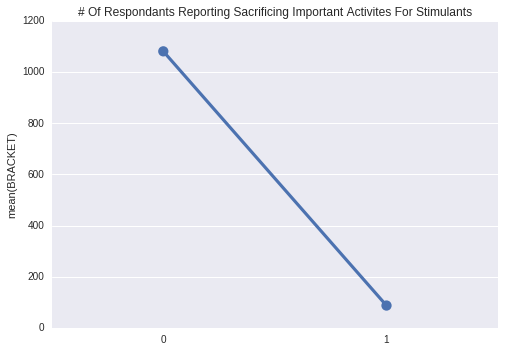

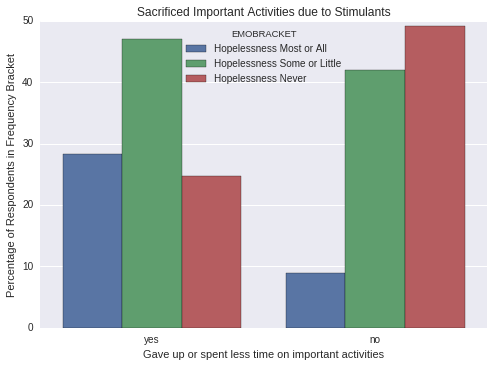

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.564706
         Nervousness Most or All       0.341176
         Nervousness Never             0.094118
2        Nervousness Some or Little    0.688549
         Nervousness Never             0.192560
         Nervousness Most or All       0.118891
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,19.256018
1,2,Nervousness Some or Little,68.854850
2,1,Nervousness Most or All,34.117647
3,1,Nervousness Some or Little,56.470588
4,1,Nervousness Never,9.411765
5,2,Nervousness Most or All,11.889132


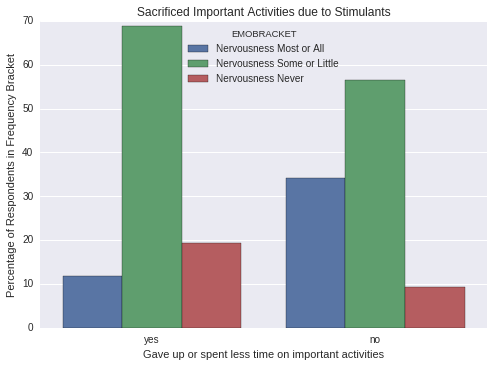

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.494118
         Restlessness Most or All       0.329412
         Restlessness Never             0.176471
2        Restlessness Some or Little    0.584122
         Restlessness Never             0.269483
         Restlessness Most or All       0.146395
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,49.411765
1,2,Restlessness Never,26.948288
2,1,Restlessness Most or All,32.941176
3,2,Restlessness Most or All,14.639476
4,1,Restlessness Never,17.647059
5,2,Restlessness Some or Little,58.412236


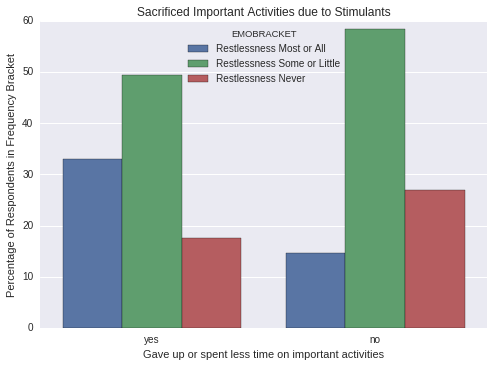

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.505882
         Depression Most or All       0.247059
         Depression Never             0.247059
2        Depression Never             0.497451
         Depression Some or Little    0.409323
         Depression Most or All       0.093227
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,24.705882
1,2,Depression Most or All,9.322651
2,1,Depression Some or Little,50.588235
3,2,Depression Never,49.745084
4,2,Depression Some or Little,40.932265
5,1,Depression Most or All,24.705882


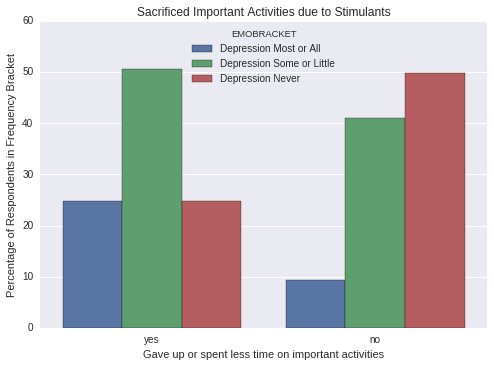

BRACKET  EMOBRACKET                 
1        Hopelessness Most or All       0.538462
         Hopelessness Some or Little    0.346154
         Hopelessness Never             0.115385
2        Hopelessness Never             0.460674
         Hopelessness Some or Little    0.421348
         Hopelessness Most or All       0.117978
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,53.846154
1,2,Hopelessness Most or All,11.797753
2,1,Hopelessness Never,11.538462
3,2,Hopelessness Some or Little,42.134831
4,1,Hopelessness Some or Little,34.615385
5,2,Hopelessness Never,46.067416


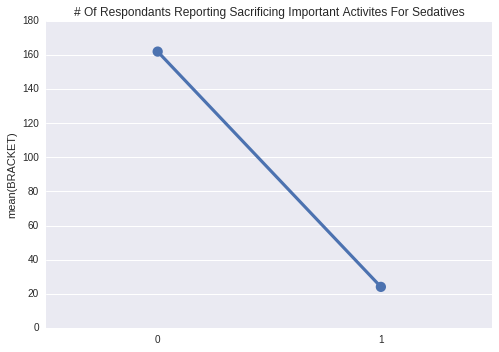

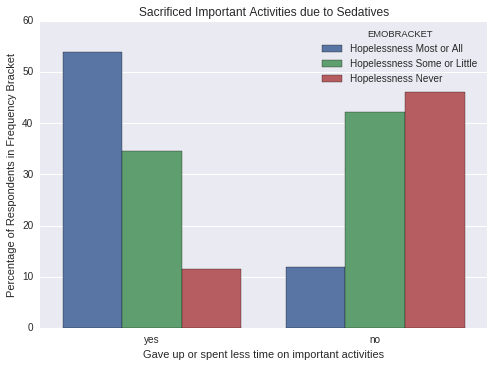

BRACKET  EMOBRACKET                
1        Nervousness Most or All       0.653846
         Nervousness Some or Little    0.307692
         Nervousness Never             0.038462
2        Nervousness Some or Little    0.665730
         Nervousness Never             0.193820
         Nervousness Most or All       0.140449
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,19.382022
1,2,Nervousness Some or Little,66.573034
2,1,Nervousness Most or All,65.384615
3,1,Nervousness Some or Little,30.769231
4,1,Nervousness Never,3.846154
5,2,Nervousness Most or All,14.044944


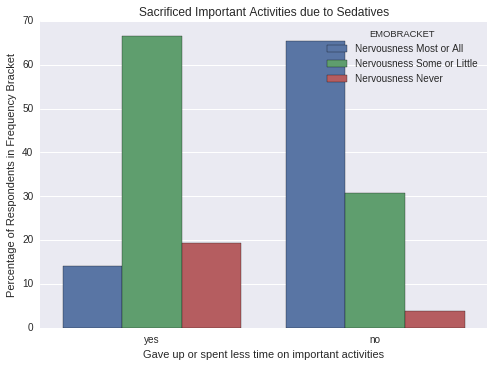

BRACKET  EMOBRACKET                 
1        Restlessness Most or All       0.500000
         Restlessness Some or Little    0.384615
         Restlessness Never             0.115385
2        Restlessness Some or Little    0.595506
         Restlessness Never             0.221910
         Restlessness Most or All       0.182584
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,38.461538
1,2,Restlessness Never,22.191011
2,1,Restlessness Most or All,50.000000
3,2,Restlessness Most or All,18.258427
4,1,Restlessness Never,11.538462
5,2,Restlessness Some or Little,59.550562


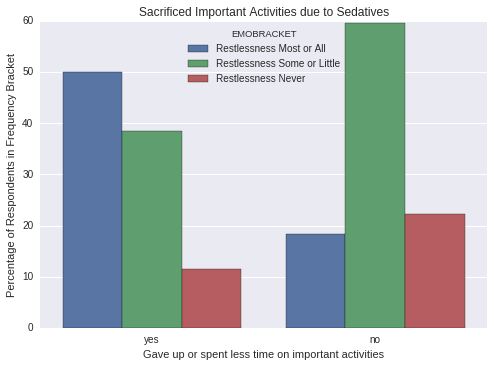

BRACKET  EMOBRACKET               
1        Depression Most or All       0.423077
         Depression Some or Little    0.423077
         Depression Never             0.153846
2        Depression Never             0.452247
         Depression Some or Little    0.429775
         Depression Most or All       0.117978
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,15.384615
1,2,Depression Most or All,11.797753
2,1,Depression Some or Little,42.307692
3,2,Depression Never,45.224719
4,2,Depression Some or Little,42.977528
5,1,Depression Most or All,42.307692


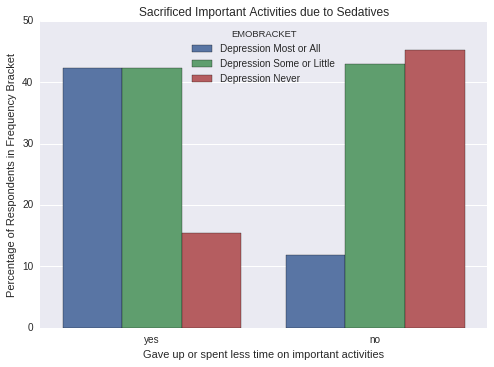

In [10]:
sacrificed_activities(df, 'HERLSACT', 'Heroin', 'HEREVER' )
mental_health_bars_activity(df, 'HERLSACT', 'DSTHOP30', 'Heroin', 'Hopelessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTNRV30', 'Heroin', 'Nervousness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTRST30', 'Heroin', 'Restlessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTCHR30', 'Heroin', 'Depression')


sacrificed_activities(df, 'HALLSACT', 'Hallucinogens', 'LSD' )
mental_health_bars_activity(df, 'HALLSACT', 'DSTHOP30', 'Hallucinogens', 'Hopelessness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTNRV30', 'Hallucinogens', 'Nervousness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTRST30', 'Hallucinogens', 'Restlessness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTCHR30', 'Hallucinogens', 'Depression')


sacrificed_activities(df, 'ANLLSACT', 'Pain Relievers', 'ANLEVER' )
mental_health_bars_activity(df, 'ANLLSACT', 'DSTHOP30', 'Pain Relievers', 'Hopelessness')
mental_health_bars_activity(df, 'ANLLSACT', 'DSTNRV30', 'Pain Relievers', 'Nervousness')
mental_health_bars_activity(df, 'ANLLSACT', 'DSTRST30', 'Pain Relievers', 'Restlessness')
mental_health_bars_activity(df, 'ANLLSACT', 'DSTCHR30', 'Pain Relievers', 'Depression')




sacrificed_activities(df, 'TRNLSACT', 'Tranquilizers', 'TRNEVER' )
mental_health_bars_activity(df, 'TRNLSACT', 'DSTHOP30', 'Tranquilizers', 'Hopelessness')
mental_health_bars_activity(df, 'TRNLSACT', 'DSTNRV30', 'Tranquilizers', 'Nervousness')
mental_health_bars_activity(df, 'TRNLSACT', 'DSTRST30', 'Tranquilizers', 'Restlessness')
mental_health_bars_activity(df, 'TRNLSACT', 'DSTCHR30', 'Tranquilizers', 'Depression')




sacrificed_activities(df, 'STMLSACT', 'Stimulants', 'STMEVER' )
mental_health_bars_activity(df, 'STMLSACT', 'DSTHOP30', 'Stimulants', 'Hopelessness')
mental_health_bars_activity(df, 'STMLSACT', 'DSTNRV30', 'Stimulants', 'Nervousness')
mental_health_bars_activity(df, 'STMLSACT', 'DSTRST30', 'Stimulants', 'Restlessness')
mental_health_bars_activity(df, 'STMLSACT', 'DSTCHR30', 'Stimulants', 'Depression')




sacrificed_activities(df, 'SEDLSACT', 'Sedatives', 'SEDEVER' )
mental_health_bars_activity(df, 'SEDLSACT', 'DSTHOP30', 'Sedatives', 'Hopelessness')
mental_health_bars_activity(df, 'SEDLSACT', 'DSTNRV30', 'Sedatives', 'Nervousness')
mental_health_bars_activity(df, 'SEDLSACT', 'DSTRST30', 'Sedatives', 'Restlessness')
mental_health_bars_activity(df, 'SEDLSACT', 'DSTCHR30', 'Sedatives', 'Depression')

In [58]:
def probs_substance(df,emoprbs, emoprbs_cnt, physprbs, physprbs_cnt, used_ever, substancestr):
    """
   
    df: dataframe of interest
    emoprbs: whether substance has caused emotional problems
    emoprbs_cnt: whether respondant continued to use substance despite emotional probs
    usedever: whether a respondant has used this substance
    for the sake of plot labelling:
    substance: human readable string of the substance
    """
    
    
    
    df_subset = df[df[emoprbs]< 3]    
    df_subset = df_subset[df_subset[emoprbs_cnt]< 3]
    df_subset = df_subset[df_subset[physprbs_cnt]< 3]
    df_substance_subset = df_subset[df_subset[used_ever]==1]
    
    emo_yvals = df_substance_subset[emoprbs_cnt].value_counts()
    phys_yvals = df_substance_subset[physprbs_cnt].value_counts()
    print 'emotional yvals'
    print emo_yvals
    print 'physical yvals'
    print phys_yvals
    sns.pointplot(x=['0','1'],y=phys_yvals, color="#bb3f3f", ax=1)
    point_plot_title = '# Of Respondants Reporting Continuing to Use ' + substancestr + ' Despite Problems'
    plt.title(point_plot_title)
    return


In [59]:

    
probs_substance(df, 'ALCEMOPB', 'ALCEMCTD', 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')
#physical_probs_substance(df, 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')


emotional yvals
1    1376
2     915
Name: ALCEMCTD, dtype: int64
physical yvals
99    2164
2       85
1       42
Name: ALCPHCTD, dtype: int64


KeyError: '0'

In [186]:
def health_probs_substance(df,emoprbs, emoprbs_cnt, physprbs, physprbs_cnt, used_ever, substancestr):
    """
   
    df: dataframe of interest
    emoprbs: whether substance has caused emotional problems
    emoprbs_cnt: whether respondant continued to use substance despite emotional probs
    usedever: whether a respondant has used this substance
    for the sake of plot labelling:
    substance: human readable string of the substance
    """
    
    
    
    df_substance_subset = df[df[used_ever]==1]
    df_emotional_subset = df_substance_subset[df_substance_subset[emoprbs_cnt]< 3]
    df_physical_subset = df_substance_subset[df_substance_subset[physprbs_cnt]< 3]
    
    
    
    emo_yvals = df_emotional_subset[emoprbs_cnt].value_counts()
    emotional_harm = sum(emo_yvals)
    phys_yvals = df_physical_subset[physprbs_cnt].value_counts()
    physical_harm = sum(phys_yvals)
    print 'emotional yvals'
    print emo_yvals
    print 'physical yvals'
    print phys_yvals

    f, (ax1, ax2, ax3) = plt.subplots(3)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)
    ax1.set_title('Emotional/Mental Health Harmed Due to ' + substancestr, fontsize=14)
    ax1.set_ylabel('# of Respondants')
    ax2.set_title('Physical Health Harmed Due to ' + substancestr, fontsize=14)
    ax2.set_ylabel('# of Respondants')
    ax3.set_title('Comparison of Emotional/Mental and Physical Health Impact from ' + substancestr, fontsize=14)
    ax3.figure.set_size_inches(10, 20)
   
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.pointplot(x=['Continue Use','Stop When Problems Arise'],y=emo_yvals,title='Emotional Problems', n_boot=10, ax=ax1)
    sns.pointplot(x=['Continue Use','Stop When Problems Arise'],y=phys_yvals, color="#bb3f3f", title='Physical Problems', n_boot=10, ax=ax2)
    
    sns.barplot(x=['Harm Emotional/Mental Health', 'Harm to Physical Health'], y=[emotional_harm, physical_harm])


emotional yvals
1    1376
2     915
Name: ALCEMCTD, dtype: int64
physical yvals
2    415
1    308
Name: ALCPHCTD, dtype: int64


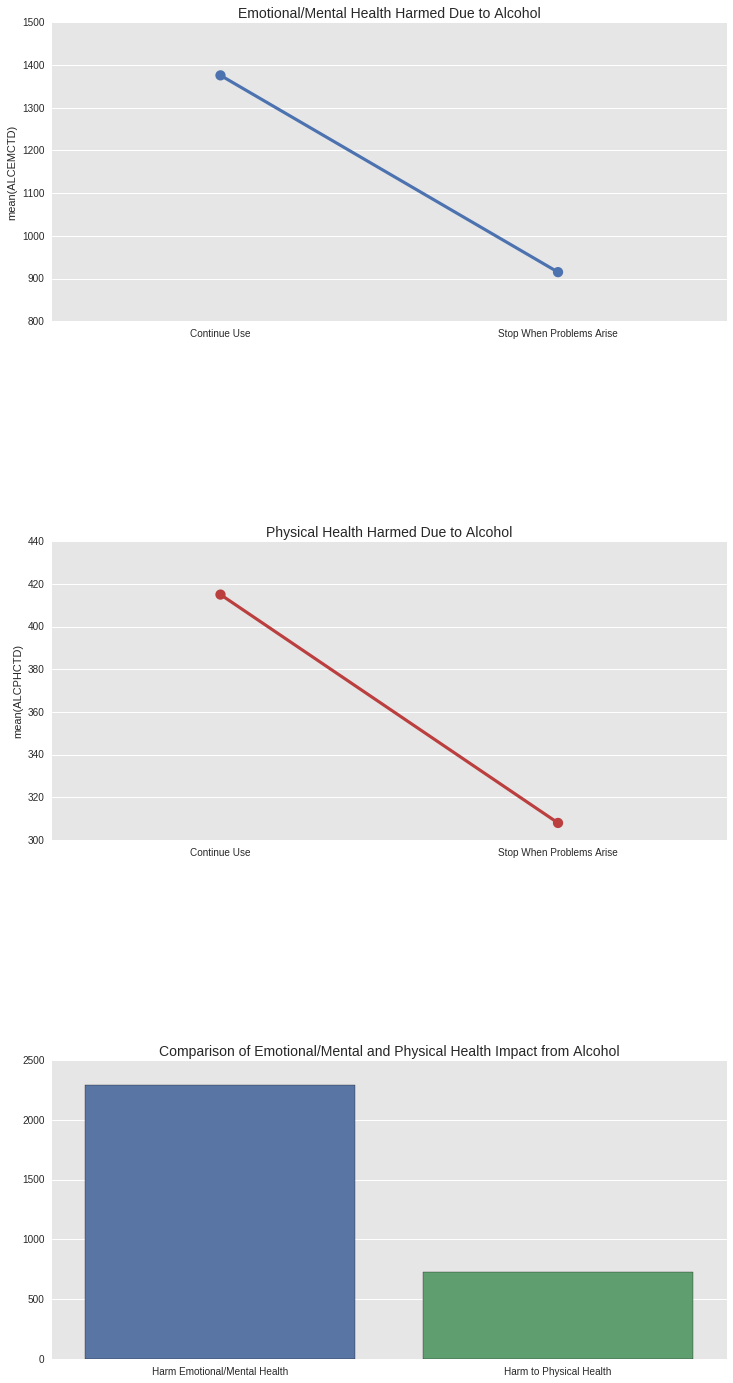

In [187]:
health_probs_substance(df, 'ALCEMOPB', 'ALCEMCTD', 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')

emotional yvals
1    493
2    286
Name: MRJEMCTD, dtype: int64
physical yvals
2    103
1     87
Name: MRJPHCTD, dtype: int64
emotional yvals
1    104
2     67
Name: COCEMCTD, dtype: int64
physical yvals
2    30
1    18
Name: COCPHCTD, dtype: int64
emotional yvals
1    95
2    20
Name: HEREMCTD, dtype: int64
physical yvals
1    8
2    7
Name: HERPHCTD, dtype: int64
emotional yvals
1    99
2    64
Name: STMEMCTD, dtype: int64
physical yvals
2    17
1     7
Name: STMPHCTD, dtype: int64
emotional yvals
1    17
2    15
Name: SEDEMCTD, dtype: int64
physical yvals
2    6
1    1
Name: SEDPHCTD, dtype: int64


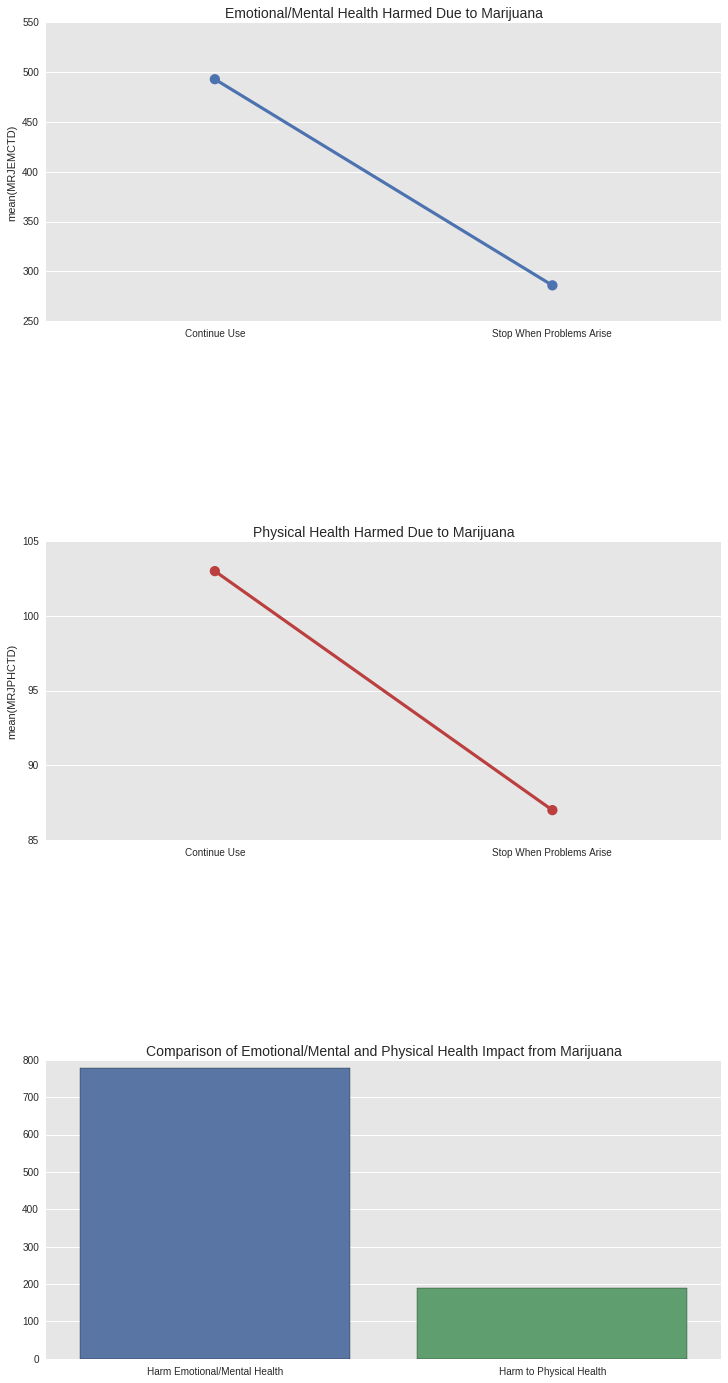

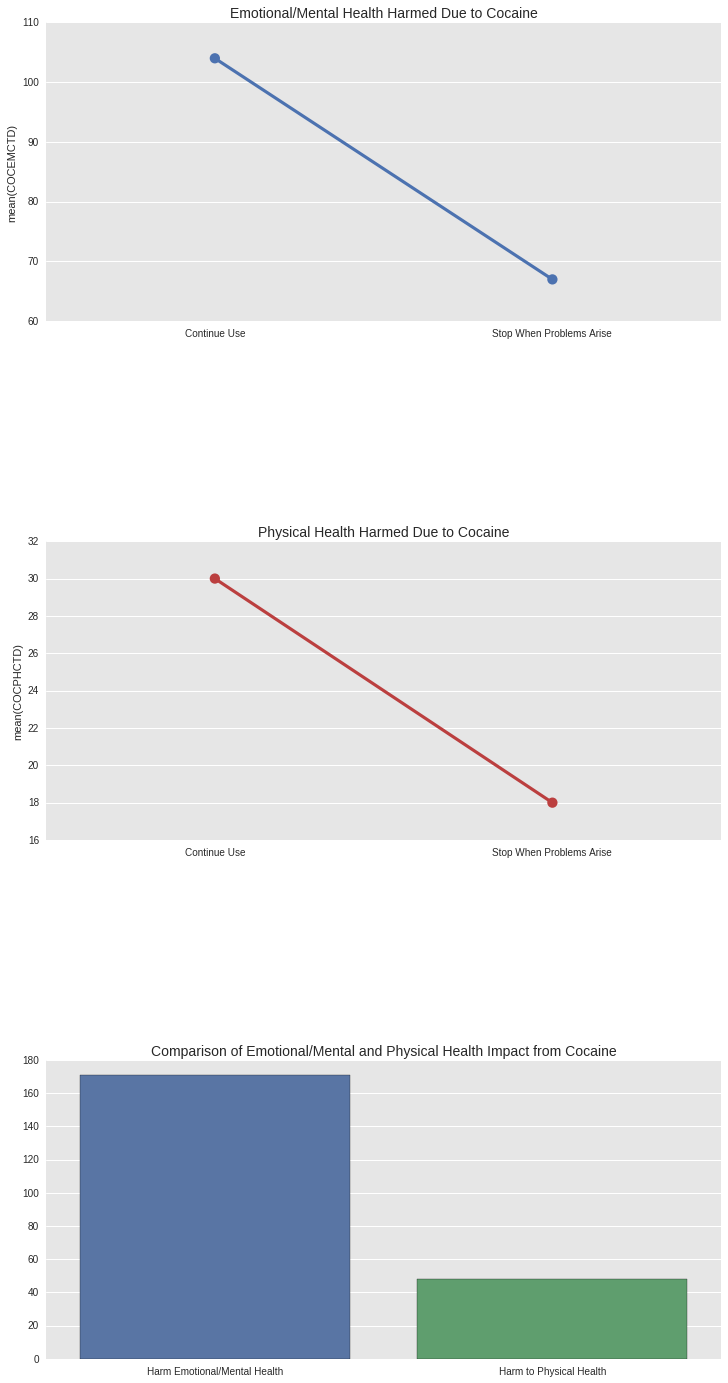

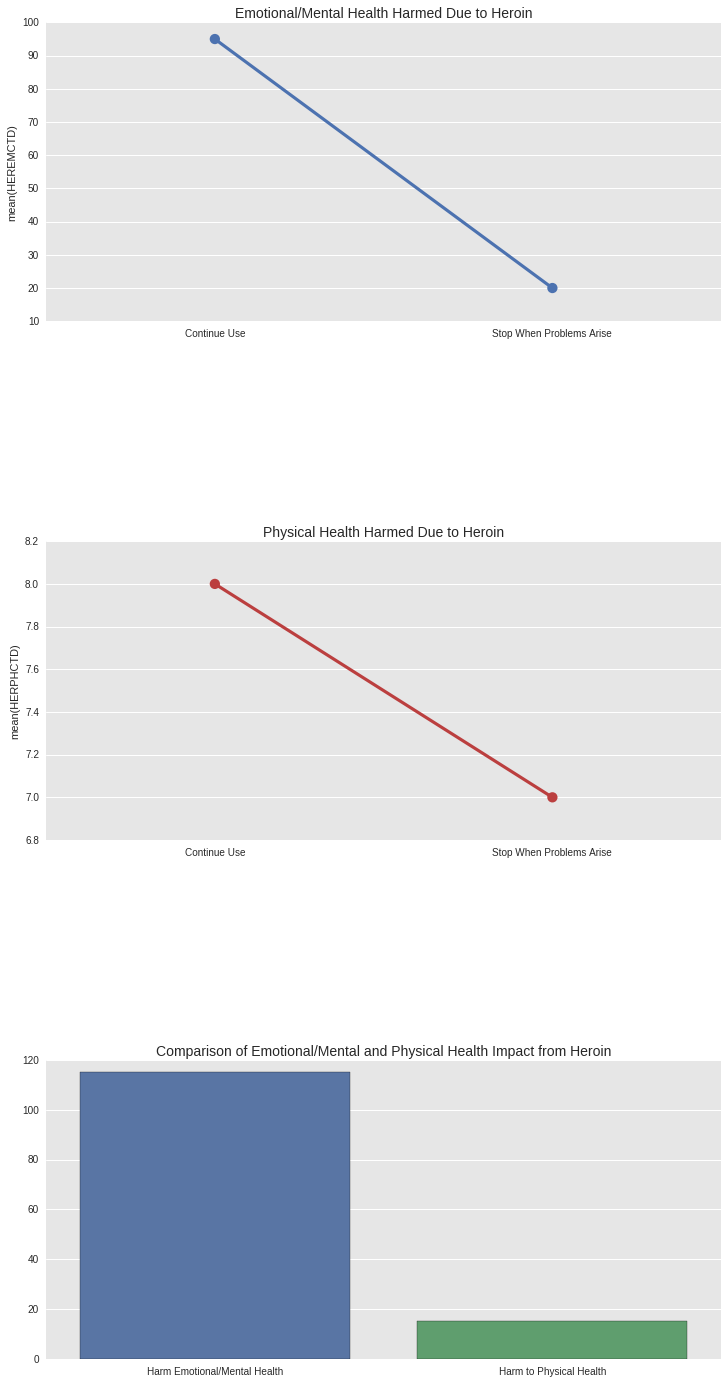

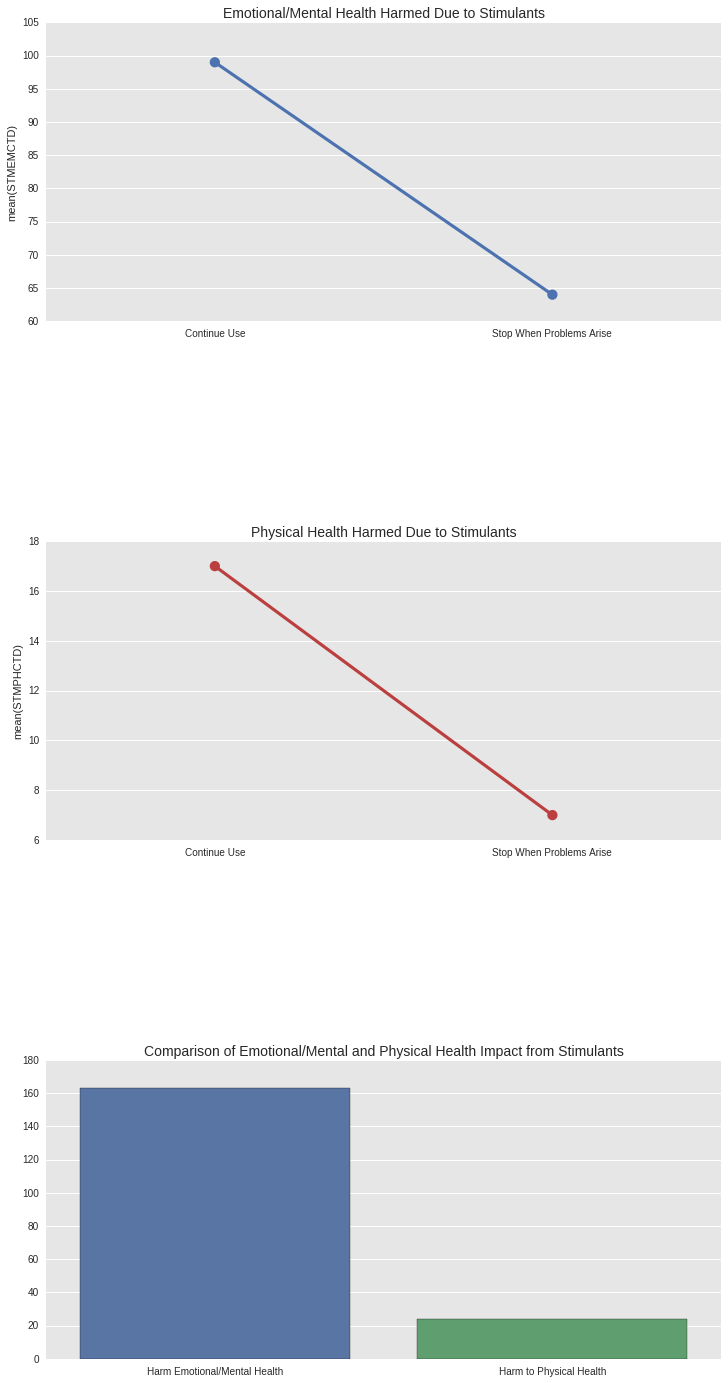

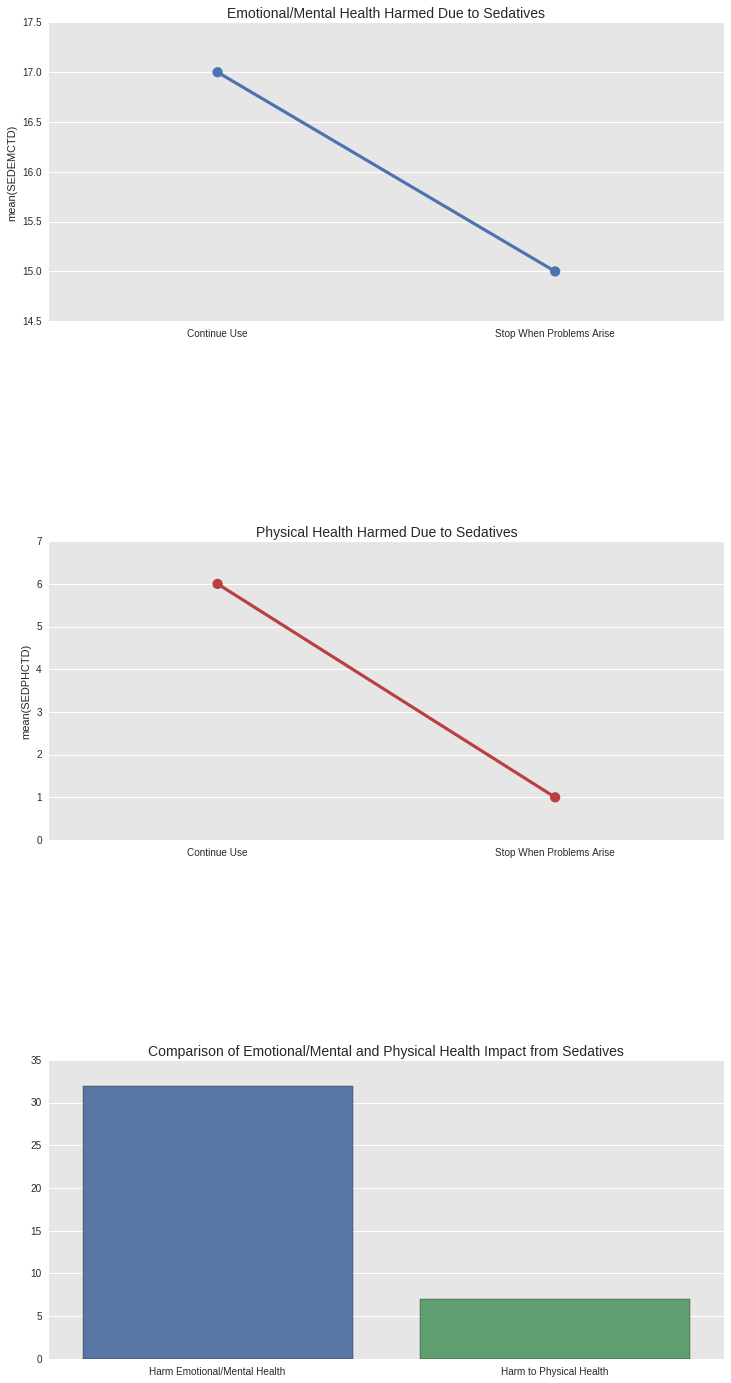

In [190]:
health_probs_substance(df, 'MRJEMOPB', 'MRJEMCTD', 'MRJPHLPB', 'MRJPHCTD', 'MJEVER', 'Marijuana')
health_probs_substance(df, 'COCEMOPB', 'COCEMCTD', 'COCPHLPB', 'COCPHCTD', 'COCEVER', 'Cocaine')
health_probs_substance(df, 'HEREMOPB', 'HEREMCTD', 'HERPHLPB', 'HERPHCTD', 'HEREVER', 'Heroin')
health_probs_substance(df, 'STMEMOPB', 'STMEMCTD', 'STMPHLPB', 'STMPHCTD', 'STMEVER', 'Stimulants')
health_probs_substance(df, 'SEDEMOPB', 'SEDEMCTD', 'SEDPHLPB', 'SEDPHCTD', 'SEDEVER', 'Sedatives')


In [ ]:
#df['AUUNMTYR']
df_needed_treatment_did_not_get = df[df['AUUNMTYR'] <3]

sns.factorplot('AUUNMTYR', data= df_needed_treatment_did_not_get, kind="count", size=2.5, aspect=.8)